In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic.api import TabularMagic
from tabularmagic.api.mlR import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR, KBestSelectorR)
from tabularmagic.api.mlC import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.3, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test datasets: (1022, 80), (438, 
      80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1022, 80)                  Test shape: (438, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, 
  LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, 
  RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, 
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
  BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, 
  Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 
  PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, 
  YearRemodAdd, Mas

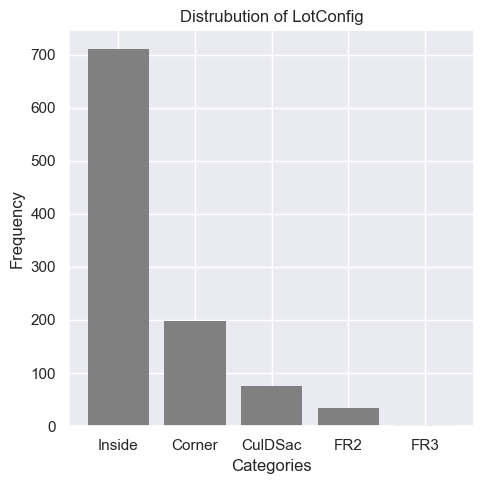

In [3]:
tm.eda().plot_distribution('LotConfig')

In [4]:
tm.datahandler().force_binary(['LotConfig'], 
                              'Inside',
                              ignore_multiclass=True)

INFO: Forced variable LotConfig to binary. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1022, 80)                  Test shape: (438, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LandSlope, 
  Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, 
  RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, 
  Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, 
  Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, 
  FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, 
  PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, LotConfig, OverallQual, OverallCond, 
  YearBuilt, YearRemodAdd, Mas

In [5]:
report = tm.ml_classification(
    models=[
        LinearC(type='no_penalty'),
        LinearC(type='l2'),
        # LinearC(type='elasticnet')
    ],
    y_var='LotConfig',
    X_vars=['LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'SalePrice']
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l2). 
INFO: Fitted model LinearC(l2). 


In [6]:
report.model_report('LinearC(no_penalty)').train_report().fit_statistics()

,LinearC(no_penalty)_train
Statistic,
accuracy,0.752404
f1,0.857143
precision,0.751825
recall,0.996774
roc_auc,0.608917
n,832


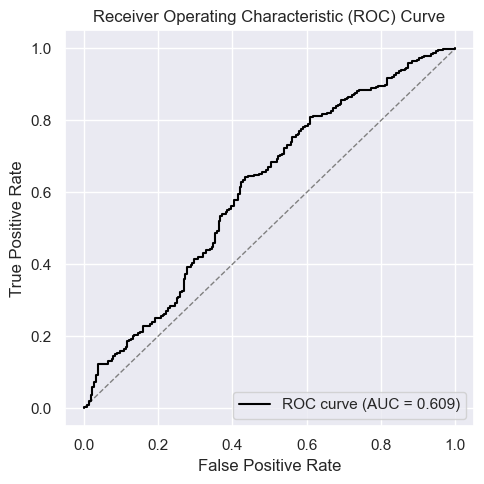

In [7]:
report.model_report('LinearC(no_penalty)').train_report().plot_roc_curve()